In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv')
print("Extracted Data (first 5 rows):")
print(df.head())

Extracted Data (first 5 rows):
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

In [5]:
summary = df.groupby('Product Category').agg({'Quantity':'sum', 'Total Amount':'sum'}).reset_index()
print("\nTransformed Summary:")
print(summary)


Transformed Summary:
  Product Category  Quantity  Total Amount
0           Beauty       771        143515
1         Clothing       894        155580
2      Electronics       849        156905


In [6]:
summary.to_csv('processed_sales_summary.csv', index=False)
print("\nTransformed data saved to 'processed_sales_summary.csv'")


Transformed data saved to 'processed_sales_summary.csv'


C:\Users\darsh\AppData\Local\Temp\ipykernel_21176\196210515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Product Category', y='Quantity', palette='viridis')


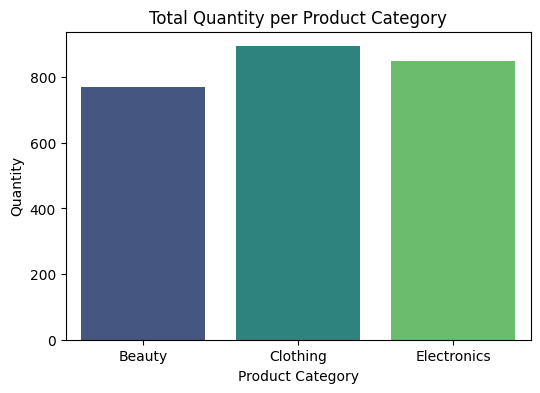

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(data=summary, x='Product Category', y='Quantity', palette='viridis')
plt.title('Total Quantity per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.show()